In [ ]:
import tensorflow as tf
from tensorflow import keras
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from google.colab import drive
drive.mount("/content/drive")

np.random.seed(0)
tf.random.set_seed(0)


Mounted at /content/drive


In [ ]:
IMAGE_SIZE = (100,100)
idg = keras.preprocessing.image.ImageDataGenerator(validation_split=0.2,)
prev = keras.models.load_model("/content/drive/My Drive/image_organizer_model.h5")

# Training

In [ ]:
%%bash
cp drive/My\ Drive/Dataset.tar.gz /content/
tar xzf Dataset.tar.gz
git clone https://github.com/samon11/meme-classifier 2>/dev/null
cp meme-classifier/train/memes/* Dataset/Memes/
cd /content


In [ ]:
%%bash
rm Dataset/Screenshots/game*

In [ ]:
load_data = partial(keras.preprocessing.image.DirectoryIterator,"Dataset",idg, seed=0, target_size=IMAGE_SIZE,)
training = load_data(subset="training")
validation = load_data(subset="validation")

Found 4432 images belonging to 3 classes.
Found 1107 images belonging to 3 classes.


In [ ]:
T = tf.data.Dataset.from_generator(lambda: idg.flow_from_directory("Dataset",subset="training", target_size=IMAGE_SIZE),
                                   output_types=(tf.float32,tf.int16), 
                                   output_shapes=( (32,*IMAGE_SIZE,3),(32,3,) )
)

In [ ]:
import autokeras as ak
clf = ak.ImageClassifier(overwrite=True,seed=1,max_trials=10)
clf.fit(T,epochs=10)

Found 4432 images belonging to 3 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Found 4432 images belonging to 3 classes.


ValueError: ignored

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32,2,activation="relu", input_shape=(*IMAGE_SIZE,3)),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64,2,activation="relu"),
    keras.layers.MaxPool2D(2),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128,2,activation="relu"),
    keras.layers.MaxPool2D(2),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(256,2,activation="relu"),
    keras.layers.MaxPool2D(2),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3,activation="softmax")
])
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 99, 99, 32)        416       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 49, 49, 32)        128       
_________________________________________________________________
dropout_10 (Dropout)         (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 24, 24, 64)       

In [ ]:
training.class_indices.keys()

dict_keys(['Documents', 'Memes', 'Screenshots'])

In [ ]:
class_weights = {
    0: 3,
    1: 1,
    2: 2
}
history = model.fit(training, validation_data=validation,class_weight=class_weights, epochs=50, callbacks=[keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)])

Epoch 1/5
  2/139 [..............................] - ETA: 23s - loss: 0.1263 - accuracy: 0.9688

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


139/139 [==============================] - 88s 631ms/step - loss: 0.3915 - accuracy: 0.9086 - val_loss: 0.5359 - val_accuracy: 0.8266
Epoch 2/5
139/139 [==============================] - 87s 629ms/step - loss: 0.3497 - accuracy: 0.9129 - val_loss: 0.8054 - val_accuracy: 0.7191
Epoch 3/5
139/139 [==============================] - 87s 627ms/step - loss: 0.3198 - accuracy: 0.9192 - val_loss: 0.3771 - val_accuracy: 0.8690
Epoch 4/5
139/139 [==============================] - 88s 630ms/step - loss: 0.2832 - accuracy: 0.9319 - val_loss: 0.4364 - val_accuracy: 0.8817
Epoch 5/5
139/139 [==============================] - 88s 632ms/step - loss: 0.2590 - accuracy: 0.9375 - val_loss: 0.5229 - val_accuracy: 0.8410


# Testing

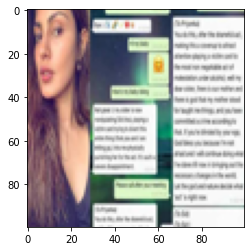

Curr	: Documents 0.0 Memes 0.037 Screenshots 0.963 Prediction: Screenshot
Prev	: Documents 0.0 Memes 0.036 Screenshots 0.964 Prediction: Screenshot


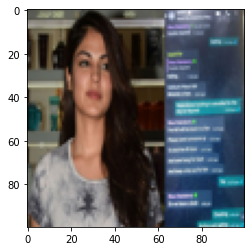

Curr	: Documents 0.005 Memes 0.917 Screenshots 0.078 Prediction: Meme
Prev	: Documents 0.003 Memes 0.897 Screenshots 0.1 Prediction: Meme


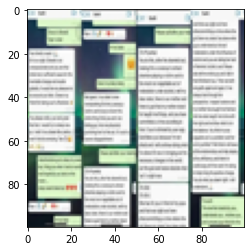

Curr	: Documents 0.014 Memes 0.01 Screenshots 0.975 Prediction: Screenshot
Prev	: Documents 0.0 Memes 0.002 Screenshots 0.998 Prediction: Screenshot


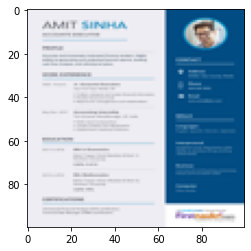

Curr	: Documents 0.21 Memes 0.088 Screenshots 0.702 Prediction: Screenshot
Prev	: Documents 0.106 Memes 0.094 Screenshots 0.8 Prediction: Screenshot


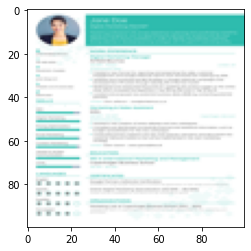

Curr	: Documents 0.002 Memes 0.004 Screenshots 0.994 Prediction: Screenshot
Prev	: Documents 0.001 Memes 0.012 Screenshots 0.986 Prediction: Screenshot


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


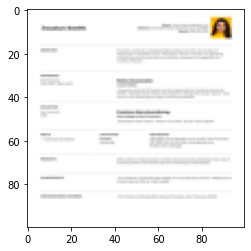

Curr	: Documents 0.856 Memes 0.003 Screenshots 0.142 Prediction: Document
Prev	: Documents 0.16 Memes 0.067 Screenshots 0.773 Prediction: Screenshot


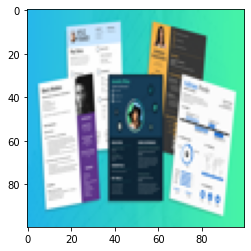

Curr	: Documents 0.0 Memes 0.012 Screenshots 0.988 Prediction: Screenshot
Prev	: Documents 0.0 Memes 0.021 Screenshots 0.979 Prediction: Screenshot


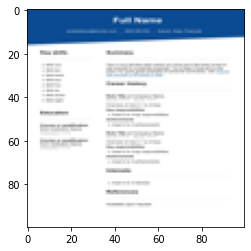

Curr	: Documents 0.104 Memes 0.001 Screenshots 0.895 Prediction: Screenshot
Prev	: Documents 0.017 Memes 0.006 Screenshots 0.976 Prediction: Screenshot


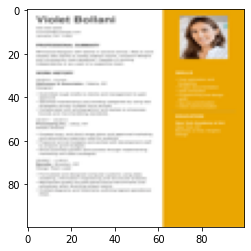

Curr	: Documents 0.983 Memes 0.004 Screenshots 0.012 Prediction: Document
Prev	: Documents 0.047 Memes 0.257 Screenshots 0.695 Prediction: Screenshot


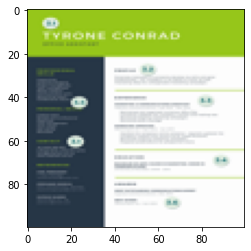

Curr	: Documents 0.013 Memes 0.012 Screenshots 0.976 Prediction: Screenshot
Prev	: Documents 0.004 Memes 0.048 Screenshots 0.948 Prediction: Screenshot


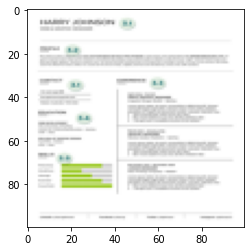

Curr	: Documents 0.007 Memes 0.017 Screenshots 0.977 Prediction: Screenshot
Prev	: Documents 0.007 Memes 0.029 Screenshots 0.964 Prediction: Screenshot


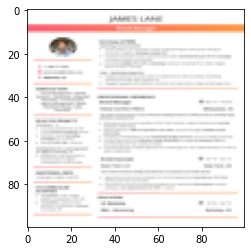

Curr	: Documents 0.955 Memes 0.0 Screenshots 0.045 Prediction: Document
Prev	: Documents 0.06 Memes 0.016 Screenshots 0.924 Prediction: Screenshot


In [ ]:
lookup = ['Documents', 'Memes', 'Screenshots']
urls = ["https://i0.wp.com/odishabytes.com/wp-content/uploads/2020/08/rhea-chakravorty-whatsapp-message-sushant-signh.jpg?resize=750%2C430&ssl=1","https://www.india.com/wp-content/uploads/2020/08/rhea-chakraborty-whatsapp-chats-doobie-sushant-singh-rajput-main.jpg","https://gizmosheets.com/wp-content/uploads/2020/08/rhea-chakrborty-sushant-chat-Whatsapp.jpg",
        "https://www.firstnaukri.com/career-guidance/wp-content/uploads/2020/02/Resume-Design.jpg","https://d.novoresume.com/images/blogs/569fd050-4d1b-11e8-b79b-272c82893bda/best-resume-format.jpeg","https://www.resumecoach.com/wp-content/themes/cv-wp-theme-resumecoach/library/images/slider/cf/toronto.png",
        "https://venngage-wordpress.s3.amazonaws.com/uploads/2018/06/infographic-resume-template-header.png","https://cdn.seeklearning.com.au/media/images/career-guide/article/resume/preview-resume-template-1.jpg","https://www.resume-now.com/wp-content/uploads/2020/03/violet-bollani-503x712.png",
        "https://urbanest.com.au/wp-content/uploads/2019/10/Urbanest-Resume-Template-b-Numbers.jpg","https://urbanest.com.au/wp-content/uploads/2019/10/Urbanest-Template-Resume-c-Numbers.jpg","https://s3-us-west-2.amazonaws.com/hiration/ghost/2018/07/combination_resume_format_2-1.png"]
for url in urls:
    img=Image.open(BytesIO(requests.get(url).content)).convert("RGB").resize(IMAGE_SIZE)
    plt.imshow(img)
    plt.show()
    img = np.array(img)
    img = idg.flow(np.array([img]))

    predict = model.predict(img)
    print("Curr\t:",end=" ")
    for k,v in zip(lookup,predict[0]):
        print(k,round(v,3),end=" ")
    v=np.argmax(predict)    
    print("Prediction:",lookup[v][:-1])

    predict = prev.predict(img)
    print("Prev\t:",end=" ")
    for k,v in zip(lookup,predict[0]):
        print(k,round(v,3),end=" ")
    v=np.argmax(predict)    
    print("Prediction:",lookup[v][:-1])

In [ ]:
model.save("/content/drive/My Drive/image_organizer_modelv2.0.h5")